In [1]:
#Need this location for rest of the project to be located from
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\bigmart_sales')

In [2]:
#Load the libraries from package 'bigmart_sales/__init__.py file under the location mentioned above'
#from bigmart_sales  import * #import the package 'bigmart_sales under the path mentioned above'
from bigmart_sales import * 
from bigmart_sales.config import *

In [3]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
#concat train  and test data.
full_data = [train_df, test_df] #TO be used for cleaning purposes

In [42]:
#check the shape of dataframe
test_df.shape

(5681, 11)

In [43]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


## See the summary of columns

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [11]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [48]:
continous_names, cat_names = get_col_names(train_df)
print('-----Summary of columns')
print('To## Missing value analysis
Acceptable missing values percentage is below 30%. any field beying that threshold can be droppedtal col -',train_df.shape[1] )
print('continous are -', len(continous_names))
print(train_df[continous_names].head(1))
print('-----')
print('categorical are -', len(cat_names))
print(train_df[cat_names].head(1))

-----Summary of columns
Total col - 12
continous are - 5
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0          9.3         0.016047  249.8092                       1999   

   Item_Outlet_Sales  
0           3735.138  
-----
categorical are - 7
  Item_Identifier Item_Fat_Content Item_Type Outlet_Identifier Outlet_Size  \
0           FDA15          Low Fat     Dairy            OUT049      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  


## Missing value analysis
Acceptable missing values percentage is below 30%. any field beying that threshold can be dropped

In [67]:
#get the rows with null values
missing_values = pd.DataFrame(train_df.isnull().sum())
#rename the columns old value: 0, new_value:'missing_per'
missing_values = missing_values.rename(columns = {'index':'variable', 0:'missing_per'})
missing_values['missing_per'] = (missing_values['missing_per']/len(train_df))*100
missing_values

,missing_per
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


## Missing value Imputation

In [68]:
# Impute the MV
for i,dataset in enumerate(full_data):
    dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())
    dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0]) #categorical variable, use mode
    
train_df.isnull().sum(),test_df.isnull().sum()

(Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 Item_Outlet_Sales            0
 dtype: int64, Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64)

## outlier analysis

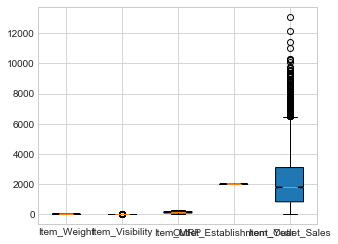

In [70]:
plot = []
for i in continous_names:
    #plt.boxplot(train_df.iloc[:,i])
    plot.append(list(train_df.loc[:,i]))
#plot = [list(train_df.loc[:,'Item_Weight']), list(train_df.loc[:,'Item_MRP'])]
plt.boxplot(plot, notch = 'True', patch_artist= True, labels=continous_names)
plt.show()

In [71]:
#train_df=full_data[0]
#test_df = full_data[1]
for i in continous_names:
    q75,q25 = np.percentile(train_df.loc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (iqr* 1.5)#lower fence
    max = q25 + (iqr* 1.5)#upper fence
    #if train_df.loc[:,i] < min:
    
    print('-----Thes will be droppped for col :',i,'\n',train_df[train_df.loc[:,i] >max].head())
    print(min,max)
    train_df = train_df.drop(train_df[train_df.loc[:,i] <min].index)
    train_df = train_df.drop(train_df[train_df.loc[:,i] > max].index)
    if(i!= 'Item_Outlet_Sales'):#absent in test_df
        test_df = test_df.drop(test_df[test_df.loc[:,i] <min].index)
        test_df = test_df.drop(test_df[test_df.loc[:,i] > max].index)

-----Thes will be droppped for col : Item_Weight 
    Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43           FDC02        21.35          Low Fat         0.069103   
46           NCP05        19.60          Low Fat         0.000000   
66           FDH19        19.35          Low Fat         0.033082   
89           FDN27        20.85          Low Fat         0.039624   
90           FDW20        20.75          Low Fat         0.040421   

                Item_Type  Item_MRP Outlet_Identifier  \
43                 Canned  259.9278            OUT018   
46     Health and Hygiene  153.3024            OUT045   
66                   Meat  172.5738            OUT035   
89                   Meat  117.2808            OUT049   
90  Fruits and Vegetables  122.1730            OUT010   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
43                       2009      Medium               Tier 3   
46                       2002      Medium               Tie

## Now our data is cleaned(continuous variables) , lets feast the eyes

Text(0.5, 0, 'weight')

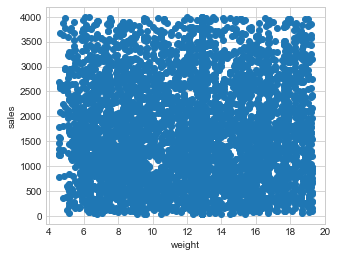

In [72]:
# let us see relationship of variables first
fig,axes = plt.subplots(figsize=(5,4))
plt.scatter(train_df.Item_Weight,train_df.Item_Outlet_Sales)
plt.ylabel('sales')
plt.xlabel('weight')
# scattered, very weak correlation (see below)

Text(0.5, 0, 'MRP')

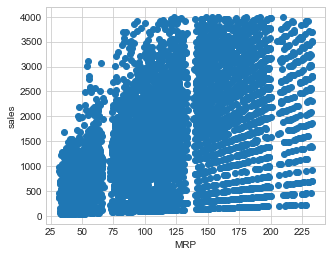

In [73]:
# let us see relationship of variables first
fig,axes = plt.subplots(figsize=(5,4))
plt.scatter(train_df.Item_MRP,train_df.Item_Outlet_Sales)
plt.ylabel('sales')
plt.xlabel('MRP')
# positive correlation (see below)

In [74]:
cor = train_df[continous_names].corr()
abs(cor['Item_Outlet_Sales']).nlargest(5)

Item_Outlet_Sales            1.000000
Item_MRP                     0.479416
Item_Visibility              0.048377
Outlet_Establishment_Year    0.037024
Item_Weight                  0.005553
Name: Item_Outlet_Sales, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280924202E8>,
      dtype=object)

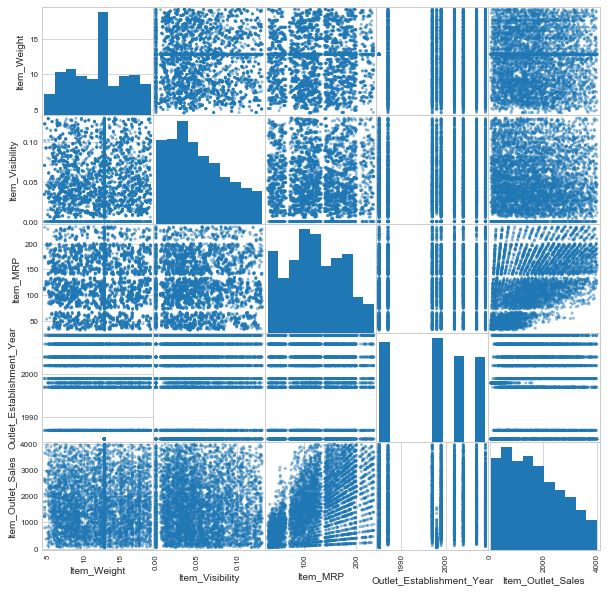

In [75]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df[continous_names],figsize=(10,10))

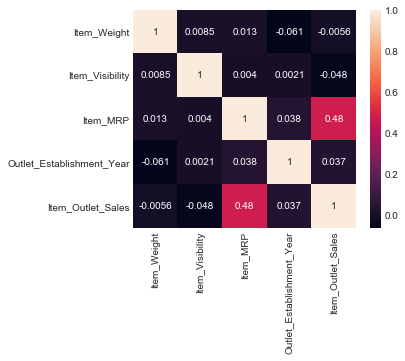

In [76]:
sb.heatmap(cor,annot=True)

# categorical variables analysis

train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()

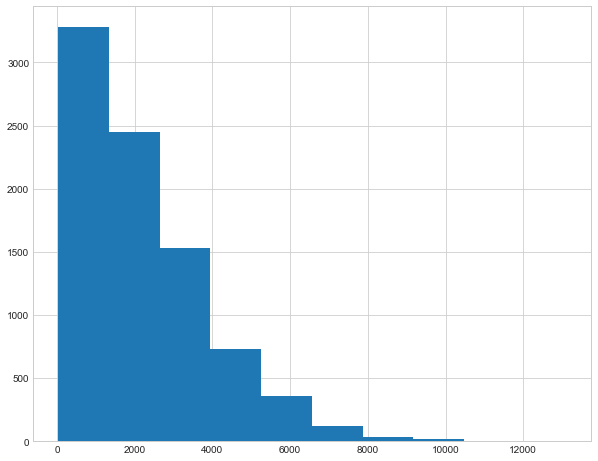

In [127]:
train_df.Item_Outlet_Sales.hist()

In [132]:
train_df[train_df.Item_Outlet_Sales<2000].Outlet_Type.value_counts()

Supermarket Type1    2797
Grocery Store        1083
Supermarket Type2     560
Supermarket Type3     227
Name: Outlet_Type, dtype: int64

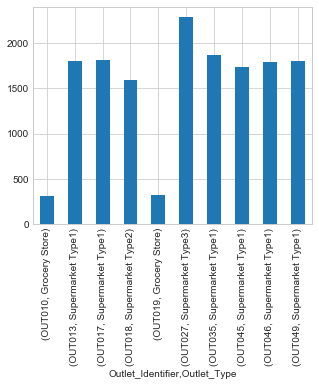

In [77]:
train_df.groupby(['Outlet_Identifier', 'Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()

['Supermarket Type2' 'Supermarket Type1' 'Grocery Store'
 'Supermarket Type3']


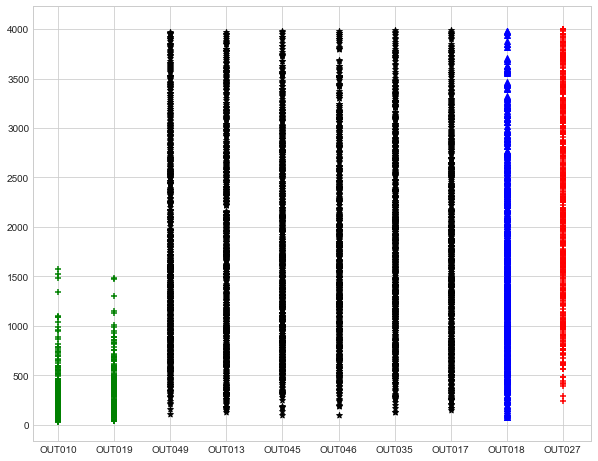

In [78]:
print(train_df['Outlet_Type'].unique())
df0 = train_df[train_df['Outlet_Type'] == 'Grocery Store']
df1 = train_df[train_df['Outlet_Type'] == 'Supermarket Type1']
df2 = train_df[train_df['Outlet_Type'] == 'Supermarket Type2']
df3 = train_df[train_df['Outlet_Type'] == 'Supermarket Type3']


import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize']=10,8

plt.scatter(df0['Outlet_Identifier'],df0['Item_Outlet_Sales'],marker='+',color='green')
plt.scatter(df1['Outlet_Identifier'],df1['Item_Outlet_Sales'],marker='*',color='black')
plt.scatter(df2['Outlet_Identifier'],df2['Item_Outlet_Sales'],marker='^',color='blue')
plt.scatter(df3['Outlet_Identifier'],df3['Item_Outlet_Sales'],marker='+',color='red')


## Insight
Out10 and out19 sales are low, and both are grocery stores, let us look next wrt their size.
Outlet_Identifier and Outlet_Type are positively correlated, and we can drop the Outlet_Identifier, as Outlet_Types is more readable.

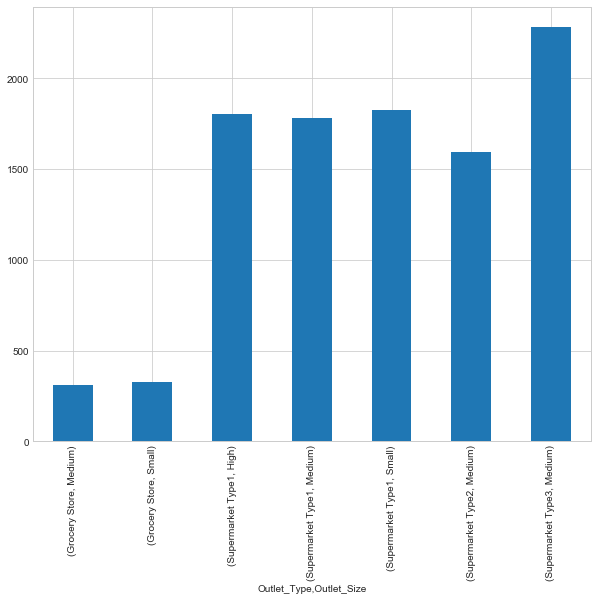

In [79]:
#Let us add Outlet size and see
train_df.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()

## Insight
Outlet_Size is not making much of a difference


In [80]:
#Let us maintain this info for later 
bar_graph_skip_list = ['Outlet_Size','Outlet_Identifier']

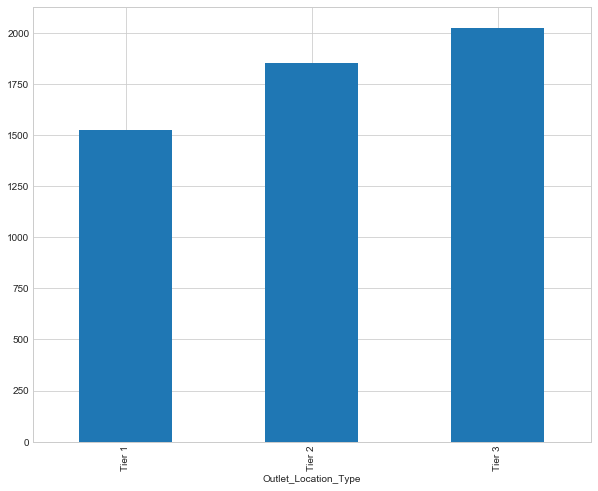

In [81]:
#No of items sold by out10 and out19 are also very less, Outlet_Location_Type

train_df.groupby([ 'Outlet_Location_Type'])['Item_Outlet_Sales'].count().plot.bar()

## Insight
Outlet_Location_Type seems significant and tells tier-3 sale was the highest

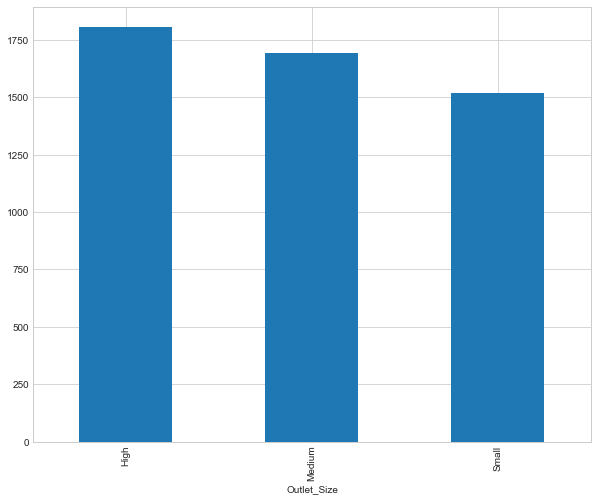

In [82]:
train_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()

## Insight
Medium sized make the most sales

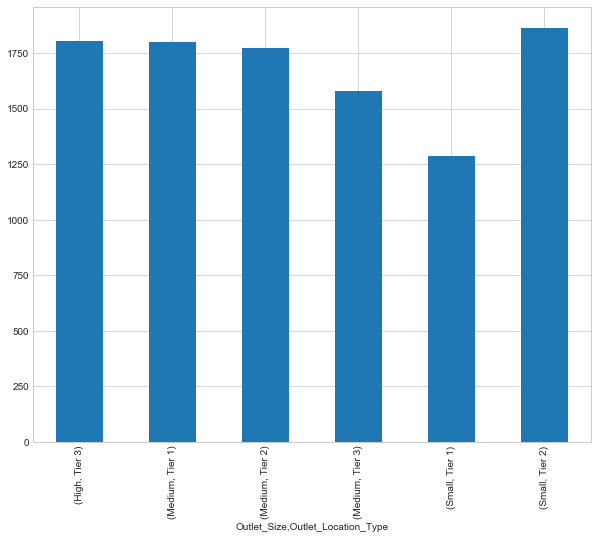

In [83]:
train_df.groupby(['Outlet_Size','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()

## Insight
Tier 3 is having highest sales value, followed by Tier 2, but overall Outlet_location_Type is not significant much

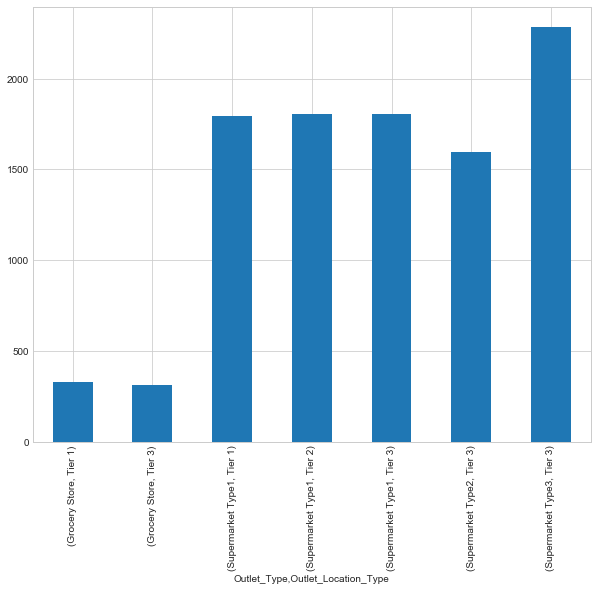

In [84]:
train_df.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()

In [29]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## FINDING:
Item_Visibilty has min value of 0, we can replace those with the mean value

In [47]:
def get_col_names(data):
    continous_names = []
    categ_names = []
    for i in data.columns:
        continous_names.append(i) if data.loc[:,i].dtypes in ['int64','int32','float32','float64'] \
        else categ_names.append(i)
    return continous_names,categ_names



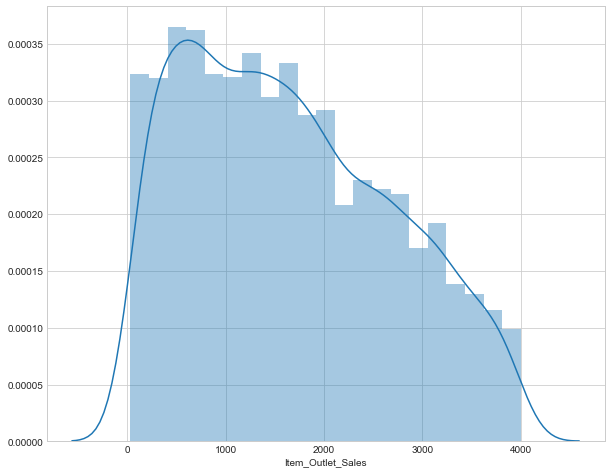

In [85]:
sb.distplot(train_df['Item_Outlet_Sales'])

## bar graph analysis b/w 
 

In [86]:
#calculate no of years of establishment
for i,dataset in enumerate(full_data):
    dataset['Outlet_age'] = 2019 - dataset['Outlet_Establishment_Year'] 
    dataset = dataset.drop(['Outlet_Establishment_Year'], axis=1)
    if i == 0:
        train_df = dataset
    else:
        test_df = dataset
    full_data = [train_df,test_df]


continous_names.remove('Outlet_Establishment_Year')


In [87]:
train_df.shape,test_df.shape

((8523, 12), (5681, 11))

In [88]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10


Text(0, 0.5, 'average sales')

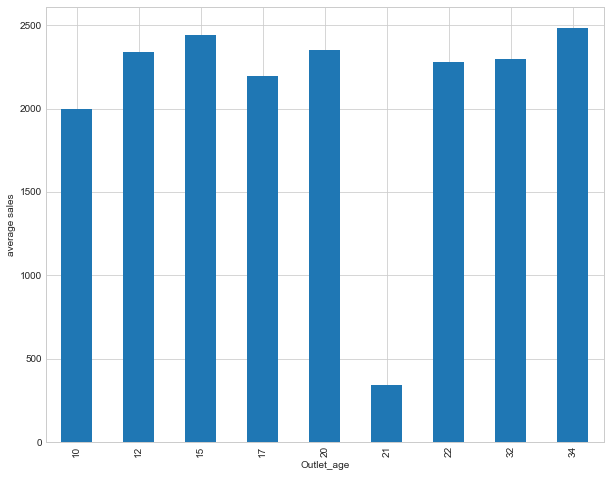

In [89]:
train_df.groupby('Outlet_age')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average sales')

## Check validity of values

In [90]:
#count Item_Visibility=0 rows --> no meaning here, so replace with mean
print(len(train_df[train_df['Item_Visibility'] == 0]))
for dataset in full_data:
    zero_visibilty_items = (dataset['Item_Visibility'] == 0)
    dataset.loc[zero_visibilty_items, 'Item_Visibility'] = dataset['Item_Visibility'].mean()
print(len(train_df[train_df['Item_Visibility'] == 0]))

526
0


Food              6125
Non-consumable    1599
Drinks             799
Name: new_Item_Identifier, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Food              4076
Non-consumable    1087
Drinks             518
Name: new_Item_Identifier, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


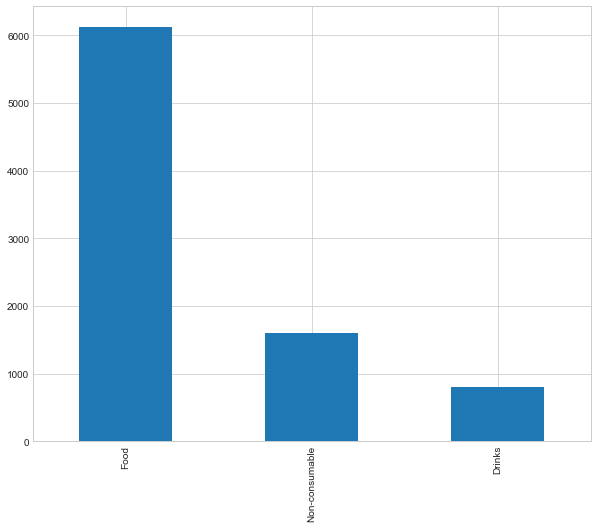

In [91]:
#See counts in each of the category Item_Identifier
for dataset in full_data:
    dataset['new_Item_Identifier'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])
    dataset['new_Item_Identifier'] = dataset['new_Item_Identifier'].replace({'FD':'Food', 'NC':'Non-consumable', 'DR':'Drinks'})
    print(dataset['new_Item_Identifier'].value_counts())
    print(dataset['new_Item_Identifier'].value_counts().plot.bar())
    #drop the old var
    dataset.drop(['Item_Identifier'], axis =1,inplace=True)
bkp_full_data = full_data


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


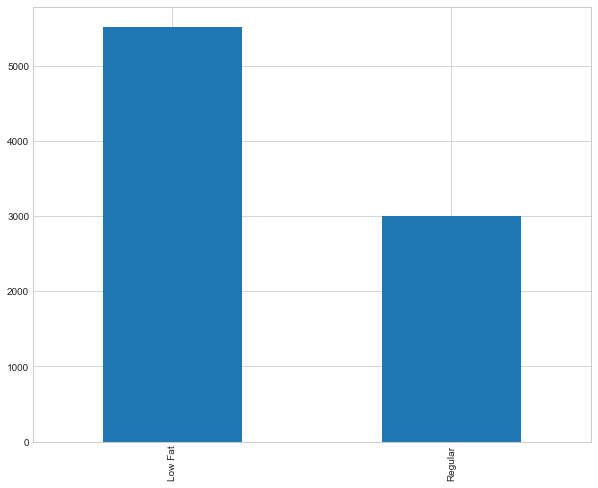

In [92]:
#A few categories are repeat, lets replace those and remove abbreviations
for dataset in full_data:
    dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
    print(dataset['Item_Fat_Content'].value_counts())
    print(dataset['Item_Fat_Content'].value_counts().plot.bar())
bkp_full_data = full_data

## Now lets convert series object to categorical variables 

In [93]:
train_df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,new_Item_Identifier
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks


In [94]:
#let's drop establisghment year
drop_col = ['Outlet_Identifier','Item_Type','Outlet_Location_Type']
train_df = train_df.drop(drop_col, axis = 1)
test_df = test_df.drop(drop_col, axis = 1)


In [35]:
# In case we want to convert weight to categorical like light,medium,heavy
#Get to see bins
pd.qcut(train_df['Item_Weight'],3).head()



0    (4.553999999999999, 11.1]
1    (4.553999999999999, 11.1]
2               (14.35, 21.35]
3               (14.35, 21.35]
4    (4.553999999999999, 11.1]
Name: Item_Weight, dtype: category
Categories (3, interval[float64]): [(4.553999999999999, 11.1] < (11.1, 14.35] < (14.35, 21.35]]

In [95]:
continous_names, cat_names = get_col_names(train_df)

print('-----Summary of columns')
print('Total col -',train_df.shape[1] )
print('continous are -', len(continous_names))
print(train_df[continous_names].head(1))
print('-----')
print('categorical are -', len(cat_names))
print(train_df[cat_names].head(1))

-----Summary of columns
Total col - 9
continous are - 5
   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_age
0          9.3         0.016047  249.8092           3735.138          20
-----
categorical are - 4
  Item_Fat_Content Outlet_Size        Outlet_Type new_Item_Identifier
0          Low Fat      Medium  Supermarket Type1                Food


In [60]:
train_df.shape,test_df.shape

((5321, 12), (4128, 11))

## chi-square analysis for categorical
#Hypothesis H0(NUll hypothesis)- Relation b/w all IV variable(seperately) and dependent(outlet_sales) is said to be independent of each other
#H1- says that the Relation b/w all IV variable(seperately) and dependent(outlet_sales) is said to be dependent on each other
#if p-val>0.05 the H0 is accepted, signifiying that there is no significant relation and they are independent and hence we can drop that var
#if p-val <0.05 H0 is rejected and H1 is accepted and we can include the var, since
#they are dependent and can explain the DV significantly

In [97]:
#full_data = [train_df,test_df]
skip_list = []
for i in cat_names:
    chi2, p, dof,ex = chi2_contingency(pd.crosstab(train_df['Item_Outlet_Sales'], train_df[i]))
    if(p<0.05):#H1 accepted
        print('accept -pvalue %f %s'%(p,i))
        
    else:
        print('skip -p value %f %s'%(p,i))
        skip_list.append(i)
train_df = train_df.drop(skip_list,axis=1)
test_df = test_df.drop(skip_list,axis=1)

#Remove
cat_names = [ x for x in cat_names if x not in skip_list]

accept -pvalue 0.000229 Item_Fat_Content
skip -p value 0.607021 Outlet_Size
accept -pvalue 0.000000 Outlet_Type
accept -pvalue 0.000359 new_Item_Identifier


In [99]:
train_df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,Outlet_age,new_Item_Identifier
0,9.30,Low Fat,0.016047,249.8092,Supermarket Type1,3735.1380,20,Food
1,5.92,Regular,0.019278,48.2692,Supermarket Type2,443.4228,10,Drinks


## Insight
Outlet_size is common in bar graph analysis and correlation plot also
Outlet_Location_Type is also skipped by chi-sq analysis
Outlet_Identifier and Outlet_Type are accepted by chi-sq, but according to bar-graph analysis, we
will skip Outlet_Identifier

In [100]:
train_df = train_df.drop(['Outlet_Identifier'],axis=1)#drop
test_df = test_df.drop(['Outlet_Identifier'],axis=1)
cat_names.remove('Outlet_Identifier')#update
train_df.shape,test_df.shape

KeyError: "['Outlet_Identifier'] not found in axis"

We have 2 col telling same info 'Item_Type' and 'new_Item_Identifier'

In [101]:
train_df[['Item_Type','new_Item_Identifier']].head(3)

KeyError: "['Item_Type'] not in index"

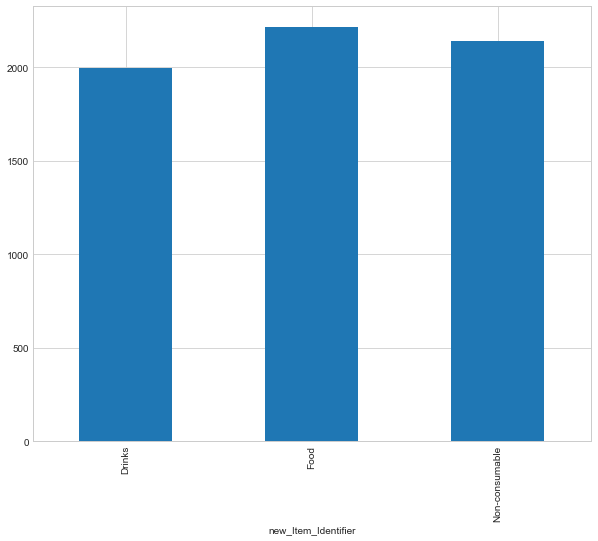

In [102]:
#Lets plot 
train_df.groupby('new_Item_Identifier').Item_Outlet_Sales.mean().plot.bar()

## Insight
out of 'Item_Type' and 'new_Item_Identifier', later one make beteer sense


In [88]:
train_df = train_df.drop(['Item_Type'],axis=1)#drop
test_df = test_df.drop(['Item_Type'],axis=1)
cat_names.remove('Item_Type')#update
train_df.shape,test_df.shape

((5321, 8), (4128, 7))

In [91]:
continous_names, cat_names = get_col_names(train_df)

print('-----Summary of columns')
print('Total col -',train_df.shape[1] )
print('continous are -', len(continous_names))
print(train_df[continous_names].head(1))
print('-----')
print('categorical are -', len(cat_names))
print(train_df[cat_names].head(1))
full_data = [train_df,test_df]

-----Summary of columns
Total col - 8
continous are - 5
   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_age
1         5.92         0.019278   48.2692           443.4228          10
-----
categorical are - 3
  Item_Fat_Content        Outlet_Type new_Item_Identifier
1          Regular  Supermarket Type2              Drinks


## Normalization/Standardization
In case of Item_Weight, its almost uniformly distributed  
Rest others are skewed, so using normalization.
used only for continous data, except the Target Variable/Dep Var

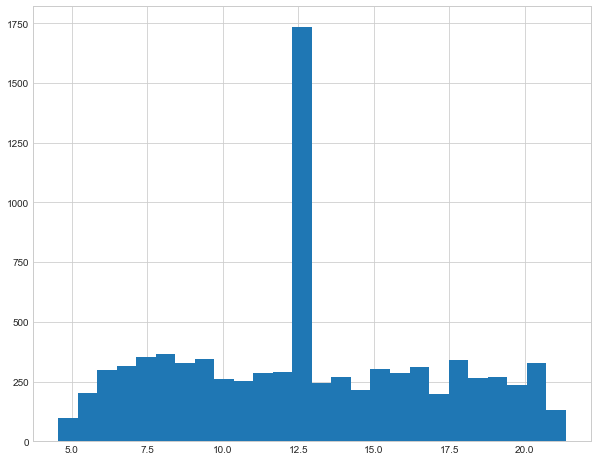

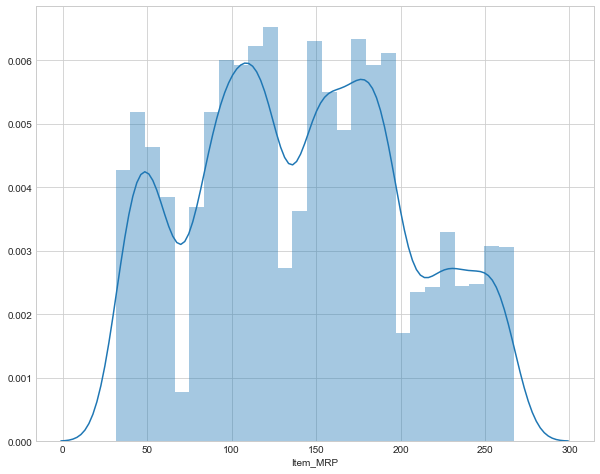

In [103]:
plt.hist(train_df.loc[:,'Item_Weight'] , bins='auto')
plt.show()
sb.distplot(train_df['Item_MRP'])
#sb.distplot(train_df['Outlet_age'])
#sb.distplot(train_df['Item_Weight'])
#sb.distplot(train_df['Item_Visibility'])


## Insight
these col are not uniformly distributed, so will do normalization not standarization

In [104]:

#normalizing for rest except TV/DV
continous_names.remove('Item_Outlet_Sales')
 
for i in continous_names:
    train_df[i] = (train_df[i] - train_df[i].min())/(train_df[i].max() - train_df[i].min())
    test_df[i] = (test_df[i] - test_df[i].min())/(test_df[i].max() - test_df[i].min())

In [105]:
train_df.head(2)



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,Outlet_age,new_Item_Identifier
0,0.282525,Low Fat,0.038399,0.927507,Supermarket Type1,3735.1380,0.416667,Food
1,0.081274,Regular,0.048346,0.072068,Supermarket Type2,443.4228,0.000000,Drinks


In [7]:
train_df.to_csv(processed_data_path,index=False)
#train_df = pd.read_csv(processed_data_path)
#train_df.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,new_Item_Identifier_Drinks,new_Item_Identifier_Food,new_Item_Identifier_Non-consumable
0,0.092889,0.126887,0.084192,443.4228,0.000000,0,1,0,0,1,0,1,0,0
1,0.880912,0.106540,0.547068,2097.2700,0.416667,1,0,0,1,0,0,0,1,0


## categorical var to dummy variables

In [106]:
train_df = pd.get_dummies(train_df, columns=cat_names)
test_df = pd.get_dummies(test_df, columns=cat_names)

In [101]:
train_df.shape, test_df.shape
train_df.to_csv(processed_data_path,index=False)

In [67]:
#Quick fix
#train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())
#train_df.isnull().sum()

Item_Weight                           0
Item_Visibility                       0
Item_MRP                              0
Item_Outlet_Sales                     0
Outlet_age                            0
Item_Fat_Content_Low Fat              0
Item_Fat_Content_Regular              0
Outlet_Type_Grocery Store             0
Outlet_Type_Supermarket Type1         0
Outlet_Type_Supermarket Type2         0
Outlet_Type_Supermarket Type3         0
new_Item_Identifier_Drinks            0
new_Item_Identifier_Food              0
new_Item_Identifier_Non-consumable    0
dtype: int64

In [107]:
def mape(actual, predicted):
    mape_ = np.mean(np.abs(actual-predicted)/actual)
    return mape_*100

def rmse(actual, predicted):
    rmse_ = np.sqrt(mean_squared_error(actual,predicted))
    return rmse_


def print_score(dv_test, dv_test_pred, dv_train, dv_train_pred):
    print('accuracy',100-mape(dv_test, dv_test_pred))#accuracy
    print('model score :',model.score(iv_test ,dv_test))
    print('model r2 score',r2_score(dv_test,dv_test_pred))
    test_deviation = rmse(dv_test, dv_test_pred)
    train_deviation = rmse(dv_train, dv_train_pred)
    print('test: rmse',test_deviation)#deviation of test data
    #print(rmse(dv_train, dv_train))#no deviation
    print('train:rmse',train_deviation)#deviation of train data


    if(test_deviation - train_deviation < 1 ):
        print ('%%%%%%%%%%Good model')
    else :
        if(test_deviation > train_deviation ):
            print('XXXXXXX overfitting problem')
        else:
             print('---------underfitting problem')

## train_test_split

In [108]:
#from sklearn.linear_model import LinearRegression 
#train_df = pd.read_csv("../data/processed/processed.csv")
iv = train_df.drop(['Item_Outlet_Sales'], axis =1)
dv = train_df['Item_Outlet_Sales'].values

iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,random_state=42)
print(type(iv_train))
model = LinearRegression().fit(iv_train, dv_train)
dv_test_pred = model.predict(iv_test)
dv_train_pred=model.predict(iv_train)
print_score(dv_test, dv_test_pred, dv_train, dv_train_pred)
print(model.score(iv_test,dv_test))

<class 'pandas.core.frame.DataFrame'>
accuracy -5.5552273661045035
model score : 0.5799860498837826
model r2 score 0.5799860498837826
test: rmse 1068.4499726132844
train:rmse 1143.579248886903
%%%%%%%%%%Good model
0.5799860498837826


## Using Kfolds

In [56]:
iv.iloc[1]

Unnamed: 0                            2.000000
Item_Weight                           0.770765
Item_Visibility                       0.108388
Item_MRP                              0.547332
Outlet_age                            0.416667
Item_Fat_Content_Low Fat              1.000000
Item_Fat_Content_Regular              0.000000
Outlet_Type_Grocery Store             0.000000
Outlet_Type_Supermarket Type1         1.000000
Outlet_Type_Supermarket Type2         0.000000
Outlet_Type_Supermarket Type3         0.000000
new_Item_Identifier_Drinks            0.000000
new_Item_Identifier_Food              1.000000
new_Item_Identifier_Non-consumable    0.000000
Name: 1, dtype: float64

In [109]:
#from sklearn.model_selection import KFold
iv = train_df.drop(['Item_Outlet_Sales'], axis =1).values
dv = train_df['Item_Outlet_Sales'].values
kf = KFold(n_splits = 5)
model = LinearRegression()
for train_index, test_index in kf.split(range(iv.shape[0])):
    #print(train_index[:5], test_index[:5])
    iv_train,iv_test,dv_train,dv_test = iv[train_index],iv[test_index],dv[train_index],dv[test_index]
    model.fit(iv_train, dv_train)
    dv_test_pred = model.predict(iv_test)
    dv_train_pred=model.predict(iv_train)
    print_score(dv_test, dv_test_pred, dv_train, dv_train_pred)

accuracy 24.28824159079271
model score : 0.4949521759627002
model r2 score 0.49495217596270014
test: rmse 735.088387525471
train:rmse 726.8239885431278
XXXXXXX overfitting problem
accuracy 24.376116247441132
model score : 0.5071939084710688
model r2 score 0.5071939084710688
test: rmse 739.2229978998375
train:rmse 725.8340684248024
XXXXXXX overfitting problem
accuracy 24.237049528171923
model score : 0.5106287597332466
model r2 score 0.5106287597332466
test: rmse 714.9532415847352
train:rmse 731.7074453994184
%%%%%%%%%%Good model
accuracy 29.917939483041394
model score : 0.5034859337434285
model r2 score 0.5034859337434285
test: rmse 734.0747349421505
train:rmse 727.0101552576059
XXXXXXX overfitting problem
accuracy 16.17493144134282
model score : 0.5250246163065472
model r2 score 0.5250246163065472
test: rmse 722.6043053153395
train:rmse 729.8497118770754
%%%%%%%%%%Good model


act : [ 111.8544 1576.6144 2433.499   601.8832 3410.2276] predicted [-488. 2536. 2028. 1280. 2592.]
intercept 1.828548218386947e+16 coef [-7.90547397e+00 -3.39617726e+01  2.15106064e+03 -4.38801085e+01
 -1.81896775e+16]


Text(0, 0.5, 'Predictions')

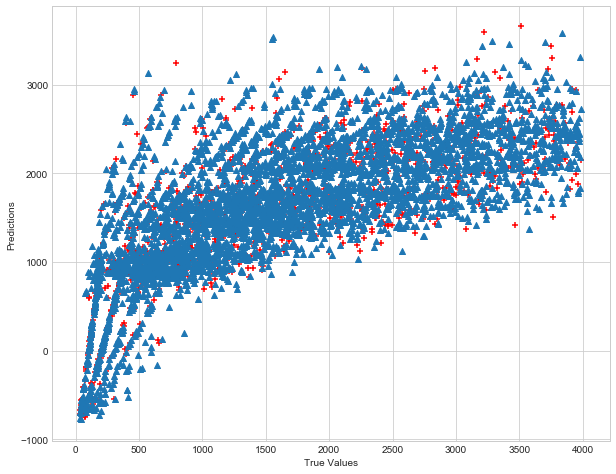

In [111]:
print('act :' ,dv_test[:5],'predicted',dv_test_pred[:5])
print('intercept',model.intercept_, 'coef',model.coef_[:5])
plt.scatter(dv_test, dv_test_pred,marker='+',color='red')
plt.scatter(dv_train, dv_train_pred,marker='^')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [109]:
model = DecisionTreeRegressor(max_depth=2)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)

model.score(iv_test,dv_test)*100 #model score in %

22.455673397607
1228.885184888758


44.437990094611536

In [111]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)

model.score(iv_test,dv_test)*100 #model score in %

C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


47.143594422087446

In [120]:
train_df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [116]:
feature_dataframe = pd.DataFrame( {'features': iv_train.columns,
     'Random Forest feature importances': model.feature_importances_})
feature_dataframe
#Since we had only MRP which had a good corelation with sales, importance is higher

,features,Random Forest feature importances
0,Item_Weight,0.00000
1,Item_Visibility,0.00000
2,Item_MRP,0.57733
3,Outlet_age,0.00000
4,Item_Fat_Content_Low Fat,0.00000
5,Item_Fat_Content_Regular,0.00000
6,Outlet_Type_Grocery Store,0.42267
7,Outlet_Type_Supermarket Type1,0.00000
8,Outlet_Type_Supermarket Type2,0.00000
9,Outlet_Type_Supermarket Type3,0.00000


In [139]:
#class to extend sklearn classifier
class sklearnHelper(object):
    def __init__(self, clf, seed = 0, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def train(self, train_iv, train_dv):
        self.clf.fit(train_iv, train_dv)#train on training data
    def predict(self, test_iv):
        return self.clf.predict(test_iv)
    def score(self, iv_test, dv_test):
        return self.clf.score(iv_test, dv_test)
    def feature_importances(self,x, y):
        print(self.clf.fit(x,y).feature_importances_)
    
        

In [126]:
DTRegressor_params = {
    'max_depth' : 2
    }
SEED = 0#for reprducibility
NFOLDS = 5 #set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS)

In [143]:
#call with object of respective class and initialize the parameters
lr = sklearnHelper(clf = LinearRegression, seed = SEED)
dtr = sklearnHelper(clf=DecisionTreeRegressor, seed=SEED, params=DTRegressor_params)

In [144]:

def get_oof(data,clf, iv, dv):
    i = 0
    avg_score = 0
    it_score = 0
    for train_index,test_index in kf.split(range(data.shape[0])):
        iv_train, iv_test, dv_train,dv_test = iv[train_index], iv[test_index]\
                                ,dv[train_index], dv[test_index]
            
        clf.train(iv_train, dv_train)
        dv_test_pred = clf.predict(iv_test)
        it_score = clf.score(iv_test, dv_test)
        avg_score += it_score
        print(it_score)
    return avg_score/NFOLDS

In [145]:
iv = train_df.drop(['Item_Outlet_Sales'], axis =1).values
dv = train_df['Item_Outlet_Sales'].values


print('LinearRegression-------')
lr_avg_score = get_oof(train_df, lr, iv, dv)
print('Average LinearRegressor score', lr_avg_score)
print('DecisionTreeRegressor-----------------')
dtr_avg_score = get_oof(train_df,dtr, iv, dv)
print('Average DecisionTreeRegressor score', dtr_avg_score)
print("Training complete")
print('%%%%%%% DecisionTreeRegressor performs better for training set' if dtr_avg_score>lr_avg_score else '%%%%%%%% LinearRegression performs better for training set')

LinearRegression-------
0.4949521759627002
0.5071939084710688
0.5106287597332466
0.5034859337434285
0.5250246163065472
Average LinearRegressor score 0.5082570788433983
DecisionTreeRegressor-----------------
0.4246269940359454
0.45223223491678166
0.4133493878627521
0.40765795801819316
0.4369253272882493
Average DecisionTreeRegressor score 0.4269583804243843
Training complete
%%%%%%%% LinearRegression performs better for training set


In [158]:
#Now that we know LinearRegressor fits better, we can use all of the train data to feed the model

iv = train_df.drop(['Item_Outlet_Sales'], axis =1)
dv = train_df['Item_Outlet_Sales'].values

iv_test = test_df.drop(['Item_Outlet_Sales'], axis =1)
#iv_test = pd.read_csv(test_data_path)
model = LinearRegression().fit(iv,dv)#Train the model using full training excel
#Let's predict for actual test data
dv_test_pred = model.predict(iv_test)
iv_test['Item_Outlet_Sales'] = dv_test_pred

#write back the results
iv_test.to_csv(submitted_data_path,index=False)


